# Mosquito Detection on Human Skin

* [Google Colab Notebook](https://colab.research.google.com/drive/1rysqMchy9Ckg_mKtX-jzwjIKvChwAwh2?usp=sharing)
* [Dataset](https://www.kaggle.com/datasets/naiborhujosua/mosquito-on-human-skin)


# Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the data

If you use google colab for training, you can use kaggle datasets directly with the help of a token. [Reference](https://www.kaggle.com/general/74235)

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/house-rent-prediction-dataset      House Rent Prediction Dataset               82KB  2022-08-20 13:49:03           4467        148  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts  McDonald's India : Menu Nutrition Dataset    5KB  2022-07-28 17:08:52           4168        164  0.9411765        
arianazmoudeh/airbnbopendata                         Airbnb Open Data                            10MB  2022-08-01 15:58:10           2605         86  0.9705882        
digitalbro/usa-childrens-hospitals                   USA Childrens Hospitals                     18KB  2022-08-24 02:20:09    

In [ ]:
!kaggle datasets download -d naiborhujosua/mosquito-on-human-skin

!unzip /content/mosquito-on-human-skin.zip

Streaming output truncated to the last 5000 lines.
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/428.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/434 - Copy.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/434.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/446 - Copy.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/446.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/447 - Copy.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/447.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/457 - Copy.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/457.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/46 - Copy.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/46.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/aegypti smashed/47 - Copy.jpg  
  inflating: zw4p9kj6nt-2/data_splitting/Test/

In [ ]:
IMAGE_DIR = "/content/zw4p9kj6nt-2/data_splitting/"

In [ ]:
# Create a list of all the class names
import os

class_names = sorted(os.listdir(IMAGE_DIR+"/Pred"))
class_names

['Culex landing',
 'Culex smashed',
 'aegypti landing',
 'aegypti smashed',
 'albopictus landing',
 'albopictus smashed']

In [ ]:
# Defining the training, validation and testing directories
IMAGE_DIR = "/content/zw4p9kj6nt-2/data_splitting/"

TRAIN_DIR = "/content/zw4p9kj6nt-2/data_splitting/Train/"
VAL_DIR = "/content/zw4p9kj6nt-2/data_splitting/Pred/"
TEST_DIR = "/content/zw4p9kj6nt-2/data_splitting/Test/"

# View images in training dataset

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_images(dirpath, class_names=class_names):
  """
  A utility function to view random images and their labels from the specified directory
  """
  plt.figure(figsize=(20, 14))
  for i in range(1, 6):
    class_name = random.choice(class_names)

    img = mpimg.imread(dirpath+class_name+"/"+random.choice(os.listdir(dirpath+class_name)))
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis(False)
    

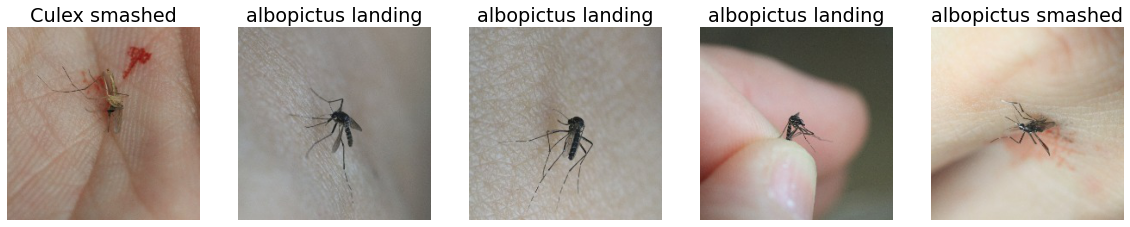

In [ ]:
view_random_images(TRAIN_DIR, class_names=class_names)

# Create ImageDataGenerators

Create ImageDataGenerators to Rescale our images between 0 and 1 i.e., **Normalizing** the images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

Creating training, validation and testing data

In [ ]:
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

val_data = val_datagen.flow_from_directory(VAL_DIR,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode="categorical")

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 4200 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.
Found 1799 images belonging to 6 classes.


# Creating a basic model

In [ ]:
import tensorflow as tf

In [ ]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 4)                 602116    
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 6)                 30        
                                                                 
Total params: 602,166
Trainable params: 602,166
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
history_1 = model_1.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
132/132 [==============================] - 14s 101ms/step - loss: 2.1021 - accuracy: 0.1581 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/20
132/132 [==============================] - 14s 108ms/step - loss: 1.7919 - accuracy: 0.1583 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/20
132/132 [==============================] - 17s 129ms/step - loss: 1.7919 - accuracy: 0.1633 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/20
132/132 [==============================] - 13s 98ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/20
132/132 [==============================] - 13s 99ms/step - loss: 1.7920 - accuracy: 0.1602 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/20
132/132 [==============================] - 13s 99ms/step - loss: 1.7919 - accuracy: 0.1638 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/20
132/132 [==============================] - 13s 98ms/step - loss: 1.7919 - accuracy: 0.1507 - val_loss: 1.7918 - val_accura

## Plot the curves

In [ ]:
def plot_curves(history):
  """
  A utility function that inputs a keras History object and plot the loss and accuracy (both training and validation) of the model 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.rcParams['font.size'] = '16'

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


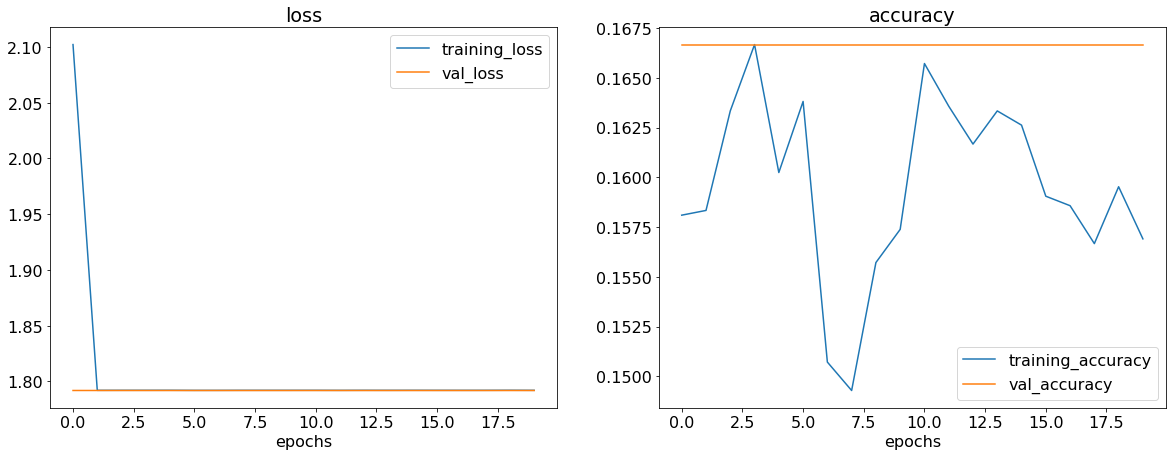

In [ ]:
plot_curves(history_1)

## Get predictions on testing data

In [ ]:
model_1.evaluate(test_data)

57/57 [==============================] - 3s 56ms/step - loss: 1.7918 - accuracy: 0.1668


[1.7917625904083252, 0.16675931215286255]

## Save the model

In [ ]:
model_1.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Mosquito Detection on Human Skin models/model_1.h5")

# Improving the model (Adding Convolutional Layers)

In [ ]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_13 (Dense)            (None, 6)                 2851446   
                                                                 
Total params: 2,853,546
Trainable params: 2,853,546
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
history_2 = model_2.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
132/132 [==============================] - 15s 113ms/step - loss: 2.3866 - accuracy: 0.2131 - val_loss: 1.4059 - val_accuracy: 0.4292
Epoch 2/20
132/132 [==============================] - 15s 111ms/step - loss: 1.1677 - accuracy: 0.5262 - val_loss: 1.0653 - val_accuracy: 0.5619
Epoch 3/20
132/132 [==============================] - 15s 112ms/step - loss: 0.8220 - accuracy: 0.6921 - val_loss: 0.9419 - val_accuracy: 0.6272
Epoch 4/20
132/132 [==============================] - 15s 113ms/step - loss: 0.5476 - accuracy: 0.8133 - val_loss: 0.8515 - val_accuracy: 0.6939
Epoch 5/20
132/132 [==============================] - 15s 113ms/step - loss: 0.3004 - accuracy: 0.9026 - val_loss: 1.0487 - val_accuracy: 0.6736
Epoch 6/20
132/132 [==============================] - 16s 120ms/step - loss: 0.1572 - accuracy: 0.9586 - val_loss: 0.9432 - val_accuracy: 0.7469
Epoch 7/20
132/132 [==============================] - 15s 113ms/step - loss: 0.0590 - accuracy: 0.9890 - val_loss: 0.9942 - val_ac

## Plot the curves

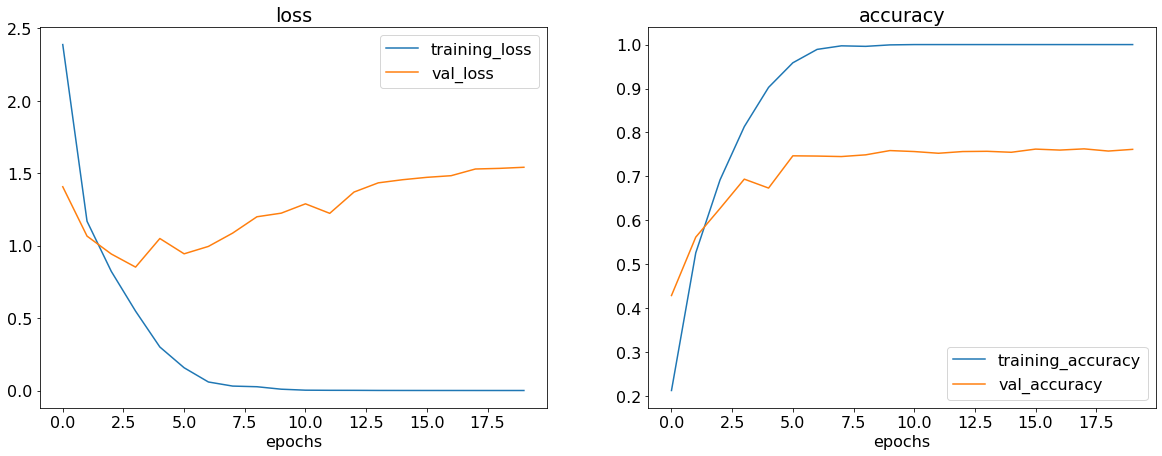

In [ ]:
plot_curves(history_2)

## Get predictions on testing data

In [ ]:
model_2.evaluate(test_data)

57/57 [==============================] - 3s 60ms/step - loss: 3.0666 - accuracy: 0.5114


[3.0665619373321533, 0.5113952159881592]

## Save the model

In [ ]:
model_2.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Mosquito Detection on Human Skin models/model_2.h5")

# Improving the model further (Adding MaxPooling Layers)

In [ ]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),                                   
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

## Train the model

In [ ]:
history_3 = model_3.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
132/132 [==============================] - 15s 109ms/step - loss: 1.5908 - accuracy: 0.3360 - val_loss: 1.2339 - val_accuracy: 0.5414
Epoch 2/20
132/132 [==============================] - 14s 108ms/step - loss: 1.1972 - accuracy: 0.5181 - val_loss: 1.2155 - val_accuracy: 0.4906
Epoch 3/20
132/132 [==============================] - 14s 108ms/step - loss: 1.0798 - accuracy: 0.5740 - val_loss: 0.9961 - val_accuracy: 0.6103
Epoch 4/20
132/132 [==============================] - 14s 108ms/step - loss: 1.0225 - accuracy: 0.5924 - val_loss: 0.9940 - val_accuracy: 0.6058
Epoch 5/20
132/132 [==============================] - 14s 107ms/step - loss: 0.9600 - accuracy: 0.6114 - val_loss: 0.9222 - val_accuracy: 0.6400
Epoch 6/20
132/132 [==============================] - 14s 107ms/step - loss: 0.9097 - accuracy: 0.6340 - val_loss: 0.9054 - val_accuracy: 0.6417
Epoch 7/20
132/132 [==============================] - 15s 116ms/step - loss: 0.8490 - accuracy: 0.6590 - val_loss: 0.9062 - val_ac

## Plot the curves

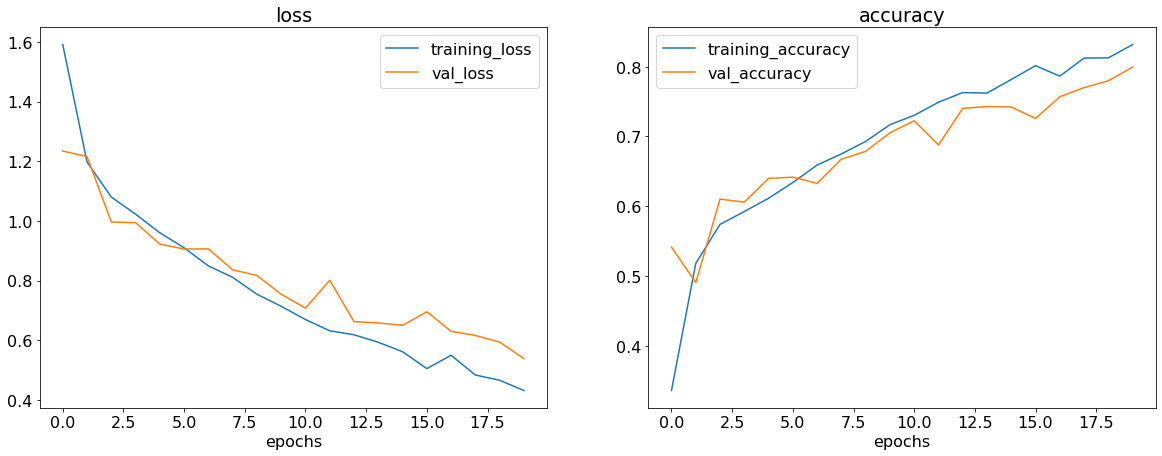

In [ ]:
plot_curves(history_3)

## Get predictions on testing data

In [ ]:
model_3.evaluate(test_data)

57/57 [==============================] - 3s 56ms/step - loss: 0.7613 - accuracy: 0.7121


[0.7613081336021423, 0.7120622396469116]

## Save the model

In [ ]:
model_3.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Mosquito Detection on Human Skin models/model_3.h5")

# Transfer Learning

In [ ]:
import tensorflow_hub as hub

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
model_4 = tf.keras.models.Sequential([
    hub.KerasLayer(resnet_url,
                   trainable=False,
                   name='feature_extraction_layer',
                   input_shape=(224, 224)+(3,)),
    tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')                                  
    ])

model_4.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 6)                 12294     
                                                                 
Total params: 23,577,094
Trainable params: 12,294
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/5
132/132 [==============================] - 27s 171ms/step - loss: 1.1433 - accuracy: 0.5571 - val_loss: 0.7984 - val_accuracy: 0.7186
Epoch 2/5
132/132 [==============================] - 21s 157ms/step - loss: 0.6855 - accuracy: 0.7555 - val_loss: 0.6319 - val_accuracy: 0.7808
Epoch 3/5
132/132 [==============================] - 21s 156ms/step - loss: 0.5579 - accuracy: 0.8102 - val_loss: 0.5452 - val_accuracy: 0.8075
Epoch 4/5
132/132 [==============================] - 21s 156ms/step - loss: 0.4827 - accuracy: 0.8324 - val_loss: 0.4829 - val_accuracy: 0.8356
Epoch 5/5
132/132 [==============================] - 21s 160ms/step - loss: 0.4242 - accuracy: 0.8590 - val_loss: 0.4450 - val_accuracy: 0.8533


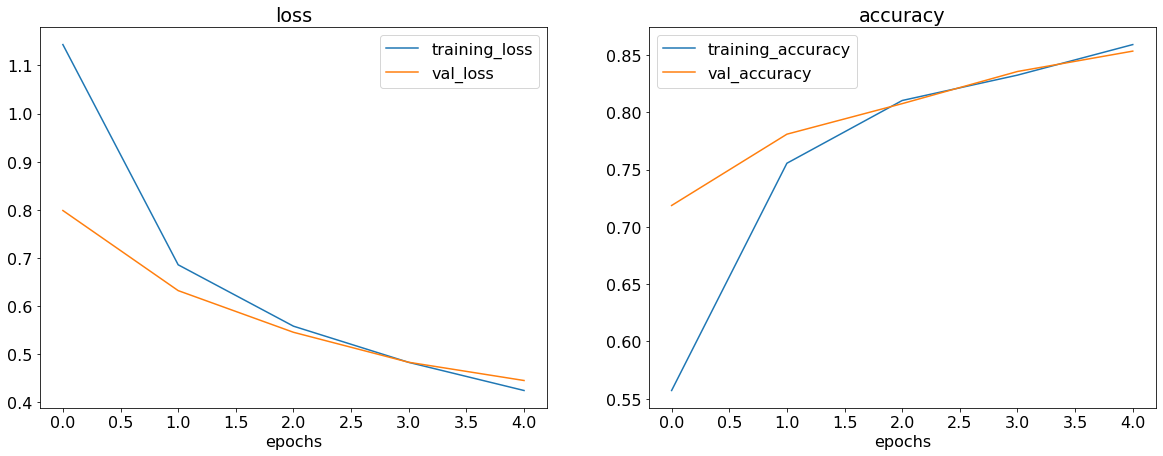

In [ ]:
plot_curves(history_4)

In [ ]:
model_4.evaluate(test_data)

57/57 [==============================] - 6s 96ms/step - loss: 0.5173 - accuracy: 0.8155


[0.5172821879386902, 0.815453052520752]

In [ ]:
model_4.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Mosquito Detection on Human Skin models/model_4.h5")

# Transfer Learning (for more epochs)

In [ ]:
model_5 = tf.keras.models.clone_model(model_4)

model_5.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 6)                 12294     
                                                                 
Total params: 23,577,094
Trainable params: 12,294
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
history_5 = model_5.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
132/132 [==============================] - 25s 164ms/step - loss: 1.0950 - accuracy: 0.5686 - val_loss: 0.8188 - val_accuracy: 0.7131
Epoch 2/20
132/132 [==============================] - 21s 156ms/step - loss: 0.6827 - accuracy: 0.7483 - val_loss: 0.6311 - val_accuracy: 0.7758
Epoch 3/20
132/132 [==============================] - 22s 163ms/step - loss: 0.5587 - accuracy: 0.8048 - val_loss: 0.5511 - val_accuracy: 0.8072
Epoch 4/20
132/132 [==============================] - 21s 157ms/step - loss: 0.4790 - accuracy: 0.8343 - val_loss: 0.4945 - val_accuracy: 0.8375
Epoch 5/20
132/132 [==============================] - 21s 160ms/step - loss: 0.4191 - accuracy: 0.8631 - val_loss: 0.4504 - val_accuracy: 0.8542
Epoch 6/20
132/132 [==============================] - 21s 157ms/step - loss: 0.3814 - accuracy: 0.8748 - val_loss: 0.4323 - val_accuracy: 0.8492
Epoch 7/20
132/132 [==============================] - 21s 157ms/step - loss: 0.3477 - accuracy: 0.8895 - val_loss: 0.3948 - val_ac

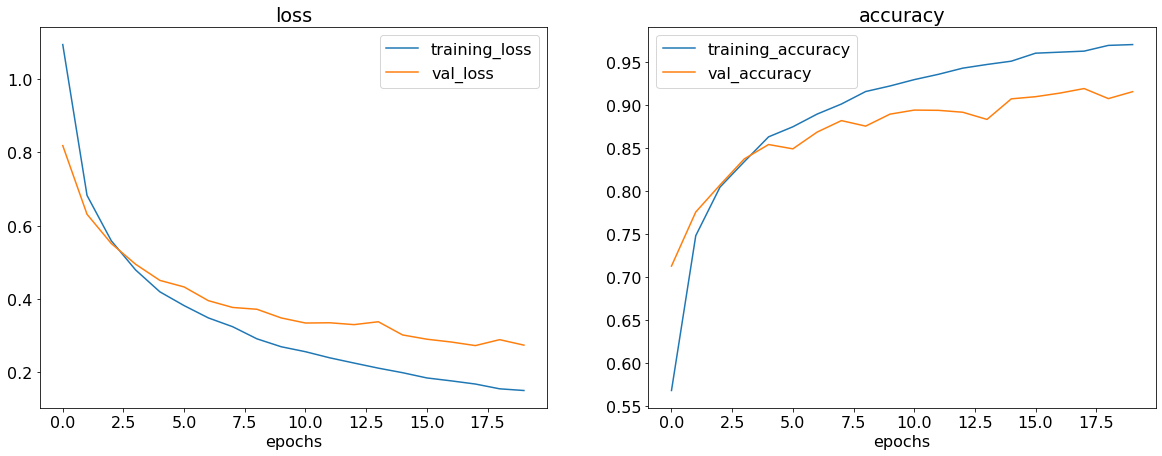

In [ ]:
plot_curves(history_5)

In [ ]:
model_5.evaluate(test_data)

57/57 [==============================] - 6s 95ms/step - loss: 0.4376 - accuracy: 0.8488


[0.4375765323638916, 0.8488048911094666]

In [ ]:
model_5.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Mosquito Detection on Human Skin models/model_5.h5")

# Predict a random image from testing dataset

In [ ]:
def pred_and_show(model, img_path, actual_class, class_names=class_names):
  """
  An utility function that uses the input model and makes prediction
  """
  # Read in the image
  img = tf.io.read_file(img_path)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  # Rescale the image (get all values betwen 0 & 1)
  img = img/255.

  pred = model.predict(tf.expand_dims(img, 0))

  if len(class_names) > 2:
    class_name = class_names[int(tf.argmax(pred[0]))]
  else:
    class_name = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Actual: {actual_class}\nPredicted: {class_name}")
  plt.axis(False)

In [ ]:
def pred_random_image(model, dir_path=TEST_DIR, class_names=class_names):
  """
  This function selects a random image from the specified directory and then predicts the possible class by calling the pred_and_show function
  """
  random_class = random.choice(class_names)

  img_path = dir_path + random_class + "/" + random.choice(os.listdir(dir_path + random_class))
  
  pred_and_show(model, img_path, random_class, class_names)

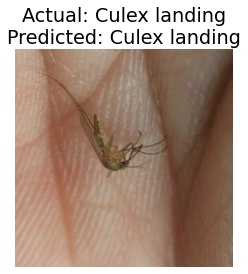

In [ ]:
pred_random_image(model_3, TEST_DIR, class_names)